## Model Experimentation

### Running and loading the prepared datasets

In [1]:
#import sys

#sys.path.append('../src/')

from dataPreparation import X_train, X_test, y_train, y_test


In [2]:
print("Shape of X_train and y_train:", X_train.shape, y_train.shape)
print("Shape of X_test and y_test:", X_test.shape, y_test.shape)

Shape of X_train and y_train: (1130960, 64) (1130960,)
Shape of X_test and y_test: (282741, 64) (282741,)


### Model Functions

In [3]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print Classification report
    print("Classification report:\n",classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.show()

    # Calculate cross-validation score
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()

    return cv_score

### Model 1: XGB Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    258456
           1       0.92      0.06      0.12     24285

    accuracy                           0.92    282741
   macro avg       0.92      0.53      0.54    282741
weighted avg       0.92      0.92      0.89    282741



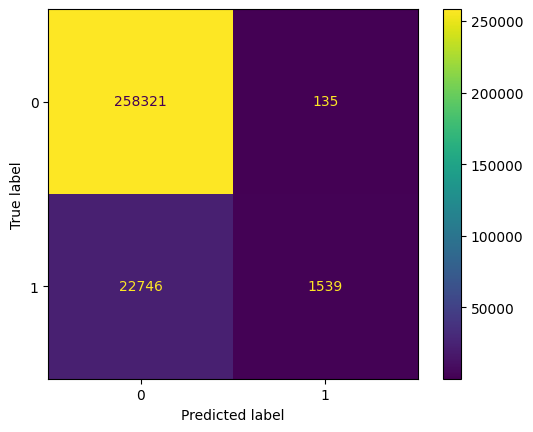

Average Accuracy of XGB Classifier is:  0.9178211430996676


In [4]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_metrics = fit_and_evaluate(xgb_classifier)

print("Average Accuracy of XGB Classifier is: ", xgb_metrics)

Accuracy on val set: 0.9141652607863734


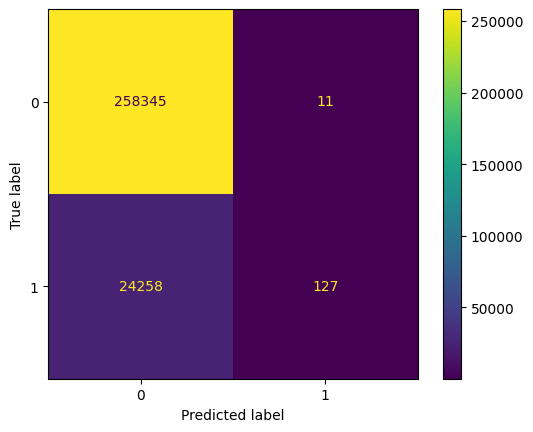

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on val set:", accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix(y_val, y_pred))
disp.plot()
plt.show()